In [14]:
import matplotlib.pyplot as plt
import numpy as np
import time 
import fireworks.nbodylib.dynamics as fdyn
import fireworks.ic as fic

# Create empty lists to store the computational time for each function
time_pyfalcon = []
time_direct = []
time_direct_vectorised = []

# Create a list of values of N from 2 to 5000
N_values = np.arange(2, 2100, 100)

for N in N_values:
    # Create a random set of initial conditions for the particles
    particles = fic.ic_random_uniform(N=N, mass = [0.1, 100.], pos = [-250., 250.], vel = [-100., 100.])
    
    # Measure the computational time for fdyn.acceleration_pyfalcon
    start_time = time.perf_counter()
    fdyn.acceleration_pyfalcon(particles)
    end_time = time.perf_counter()
    time_pyfalcon.append(end_time - start_time)
    
    # Measure the computational time for fdyn.acceleration_direct
    start_time = time.perf_counter()
    fdyn.acceleration_direct(particles)
    end_time = time.perf_counter()
    time_direct.append(end_time - start_time)
    
    # Measure the computational time for fdyn.acceleration_direct_vectorised
    start_time = time.perf_counter()
    fdyn.acceleration_direct_vectorised(particles)
    end_time = time.perf_counter()
    time_direct_vectorised.append(end_time - start_time)

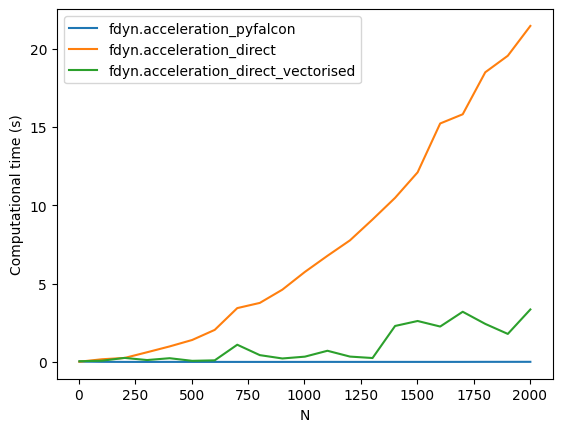

In [18]:
# Plot the results
plt.plot(N_values, time_pyfalcon, label='fdyn.acceleration_pyfalcon')
plt.plot(N_values, time_direct, label='fdyn.acceleration_direct')
plt.plot(N_values, time_direct_vectorised, label='fdyn.acceleration_direct_vectorised')
# plt.plot(N_values, N_values**2, label='O(N^2)', linestyle='--')
plt.xlabel('N')
plt.ylabel('Computational time (s)')
# plt.ylim(0, 23)
plt.legend()
plt.show()
